In [1]:
import pandas as pd

# Read the CSV files
df1 = pd.read_csv('../data/game_info.csv')
df2 = pd.read_csv('../data/Video_Games_Sales_as_at_22_Dec_2016.csv')

# Standardizing the column names
df2.columns = df2.columns.str.lower()
df1.columns = df1.columns.str.lower()

# This will only keep rows where the 'name' is found in both dataframes
merged_df = pd.merge(df2, df1, on='name', how='inner')

# Attempt to fix missing data
merged_df['developer'] = merged_df.apply(
    lambda row: row['developers'].split('||')[0] 
               if pd.notna(row['developers']) and pd.isna(row['developer']) 
               else row['developer'], 
    axis=1
)

# Drop games that that are not out yet
merged_df = merged_df[merged_df['tba'] != True]

# Dropping the specified columns
columns_to_drop = [
    # Useless due to low data quantity
    "added_status_yet", 
    "added_status_owned", 
    "added_status_beaten",
    "added_status_toplay",
    "added_status_dropped",
    "added_status_playing",
    "playtime",
    
    # Not necessary
    "slug",
    "rating_y",
    "rating_x",
    "game_series_count",
    "website",
    "updated",
    "rating_top",
    "esrb_rating",
    "tba",
    
    # Duplicates
    "ratings_count",
    "reviews_count",
    "metacritic",
    "year_of_release",
    "publishers",
    "platforms",
    "genres",
    "developers",
]
merged_df.drop(columns=columns_to_drop, axis=1, inplace=True)
#merged_df

print(merged_df.columns)
#df_filtered = df2[df2['name'] == "Grand Theft Auto V"]
#df_filtered  # Displaying the filtered DataFrame

df_cleaned = merged_df.dropna()
df_cleaned

#df_no_duplicates = df_cleaned.drop_duplicates(subset=['name'])
#df_no_duplicates

#nan_count = merged_df.isna().sum()
#nan_count

Index(['name', 'platform', 'genre', 'publisher', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'id',
       'released', 'achievements_count', 'suggestions_count'],
      dtype='object')


,name,platform,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,id,released,achievements_count,suggestions_count
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,25057,2006-11-19,0,148
3,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,24761,2008-04-27,0,413
4,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,26002,2009-07-26,0,419
5,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,24933,2006-05-15,0,136
6,Wii Play,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,24901,2007-02-12,0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,Trine,PC,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,80.0,50.0,8.2,488.0,"Frozenbyte, Inc.",5196,2009-07-03,28,655
9807,Karnaaj Rally,GBA,Racing,Jaleco,0.01,0.00,0.00,0.00,0.01,81.0,9.0,9.5,4.0,"Infinite Dreams, Paragon 5",53353,2002-11-21,0,261
9808,Hospital Tycoon,PC,Strategy,Codemasters,0.00,0.01,0.00,0.00,0.01,51.0,8.0,3.8,29.0,Big Red Software,19351,2007-06-07,0,325
9823,Breach,PC,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,40129,2011-01-26,16,685


In [2]:
from sklearn.preprocessing import LabelEncoder

# Preprocess data
data = df_cleaned.copy()
label_encoder = LabelEncoder()
categorical_cols = ['platform', 'genre', 'publisher', 'developer']

# Modified code
for col in categorical_cols:
    data.loc[:, col] = label_encoder.fit_transform(data[col])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature Selection
features = ['platform', 'genre', 'publisher', 'developer', 'critic_score', 'user_score', 'user_count', 'critic_count']
X = data[features]
y = data['global_sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Train the models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on the test data
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate the MSE for each model
linear_mse = mean_squared_error(y_test, linear_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

print(f"Linear Regression MSE: {linear_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")

# Determine which model has the lowest MSE
lowest_mse_model = 'Linear' if (linear_mse <= ridge_mse and linear_mse <= lasso_mse) else 'Ridge' if (ridge_mse <= lasso_mse) else 'Lasso'

Linear Regression MSE: 2.4115299459987463
Ridge Regression MSE: 2.411531113027125
Lasso Regression MSE: 2.4396772919502587


In [5]:
# Get the feature names from the DataFrame
feature_names = X.columns

# Get the coefficients of the lasso model
lasso_coefficients = lasso_model.coef_

# Combine the feature names and their corresponding coefficients into a DataFrame
lasso_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Print out features with a coefficient of zero
print("Features with zero coefficient in Lasso regression:")
print(lasso_coef_df[lasso_coef_df['Coefficient'] == 0])

Features with zero coefficient in Lasso regression:
      Feature  Coefficient
0    platform          0.0
1       genre          0.0
2   publisher         -0.0
5  user_score         -0.0


In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [7]:
def get_best_alpha(model,X,y,alphas):
    kf = KFold(n_splits=3, random_state = 0, shuffle=True)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, val_indexes in kf.split(X):
            X_train, X_val = X.values[train_indexes], X.values[val_indexes]
            y_train, y_val = y.values[train_indexes], y.values[val_indexes]

            model.fit(X_train, y_train)
            mse = mean_squared_error(y_val,model.predict(X_val))
            results.append((alpha, mse))
   

    best_alpha, mse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, mse

In [8]:
ridge_alphas = np.linspace(0.1, 10, 100)
lasso_alphas = np.linspace(0.001, 5, 100)

print("Ridge best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Ridge(), X_train, y_train, ridge_alphas))
print("Lasso best alpha %.4f - Avg MSE %.4f " % get_best_alpha(Lasso(), X_train, y_train, lasso_alphas))

Ridge best alpha 10.0000 - Avg MSE 3.1067 
Lasso best alpha 1.7683 - Avg MSE 3.0885 


In [9]:
# Find the best alpha for Ridge and Lasso
best_alpha_ridge, mse_ridge = get_best_alpha(Ridge(), X_train, y_train, ridge_alphas)
best_alpha_lasso, mse_lasso = get_best_alpha(Lasso(), X_train, y_train, lasso_alphas)

# Train new models with the best alphas
ridge_model = Ridge(alpha=best_alpha_ridge)
lasso_model = Lasso(alpha=best_alpha_lasso)

# Fit the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predict on the test data
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Calculate MSE for the new models
ridge_mse_test = mean_squared_error(y_test, ridge_predictions)
lasso_mse_test = mean_squared_error(y_test, lasso_predictions)

print("New Ridge MSE on test data: {:.4f}".format(ridge_mse_test))
print("New Lasso MSE on test data: {:.4f}".format(lasso_mse_test))

# Check for improvement
print("Ridge MSE improved?" , "Yes" if ridge_mse_test < mse_ridge else "No")
print("Lasso MSE improved?" , "Yes" if lasso_mse_test < mse_lasso else "No")

New Ridge MSE on test data: 2.4115
New Lasso MSE on test data: 2.4629
Ridge MSE improved? Yes
Lasso MSE improved? Yes


In [10]:
import math
linear_rmse = math.sqrt(linear_mse)
ridge_rmse_test = math.sqrt(ridge_mse_test)
lasso_rmse_test = math.sqrt(lasso_mse_test)

print("Linear RMSE on test data: {:.4f}".format(linear_rmse))
print("New Ridge RMSE on test data: {:.4f}".format(ridge_rmse_test))
print("New Lasso RMSE on test data: {:.4f}".format(lasso_rmse_test))

Linear RMSE on test data: 1.5529
New Ridge RMSE on test data: 1.5529
New Lasso RMSE on test data: 1.5694


In [11]:
# Extract the coefficients
best_model_coefficients = linear_model.coef_

# Get the feature names
feature_names = X.columns

# Combine the feature names and their corresponding coefficients into a DataFrame for better readability
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_model_coefficients
})

# Print the coefficients
print(coefficients_df)

        Feature  Coefficient
0      platform     0.005530
1         genre    -0.002973
2     publisher    -0.000046
3     developer     0.000209
4  critic_score     0.021744
5    user_score    -0.052174
6    user_count     0.000514
7  critic_count     0.019437


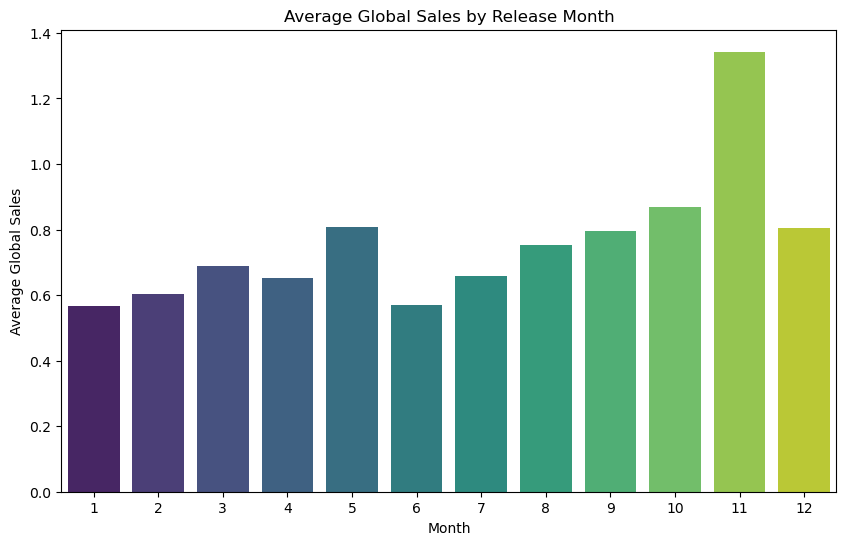

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data['release_month'] = pd.to_datetime(data['released']).dt.month

# Statistical Analysis: Calculate average sales per month
average_sales_per_month = data.groupby('release_month')['global_sales'].mean()

# Visualization: Bar chart of average sales per month
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sales_per_month.index, y=average_sales_per_month.values, palette='viridis')  # Using the 'viridis' colormap
plt.xlabel('Month')
plt.ylabel('Average Global Sales')
plt.title('Average Global Sales by Release Month')
plt.show()